c:\Users\ritam\anaconda3\envs\envthatactuallyworks\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


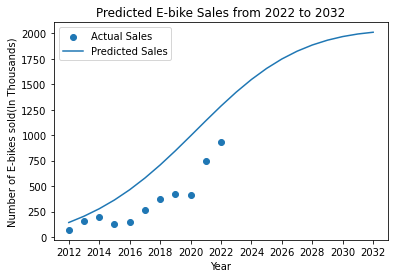

In [170]:
#Question 1

# Importing libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the dataset
data = pd.DataFrame({
    'year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'sales': [70, 159, 193, 130, 152, 263, 369, 423, 416, 750, 928]
})

"""
Sets up the following equation that combines a logistic function with a quadratic function:
logistic_func = a/(1+e^(-b(x-c)))  -  0.5(x-c)^2  +  (x-c)
                logistic                 quadratic
"""
def logistic_func(x, a, b, c, d):
    return (a / ((1 + np.exp(-b*(x-c))))) + 1*(x-c) - 0.5*(x-c)**2

"""
Sets up initial guess vales for the regression model using the minimum and maximum sales values in the dataset
"""
p0 = [max(data['sales']), 0.1, np.median(data['year']), min(data['sales'])]


"""
Discovers best fit coefficients by fitting logistic model to the data via regression
"""
popt, pcov = curve_fit(logistic_func, data['year'], data['sales'], p0=p0, maxfev=50000)
"""
Uses the previously found coefficients in a logistic function to plug in future years
and calculate their respective e-bike sales
"""
future_years = np.arange(data['year'].max() - 10, data['year'].max() + 11)
future_sales = logistic_func(future_years, *popt)

"""
Graph the logistic function curve over the raw data points
"""
plt.scatter(data['year'], data['sales'], label='Actual Sales')
plt.plot(future_years, future_sales, label='Predicted Sales')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of E-bikes sold(In Thousands)')
plt.title('Predicted E-bike Sales from 2022 to 2032')
plt.xticks(np.arange(data['year'].min(), future_years.max()+1, 2.0))
plt.show()

In [171]:
popt

array([2.15392431e+03, 2.73812781e-01, 2.02057031e+03, 7.00000000e+01])

0.3978448853915308


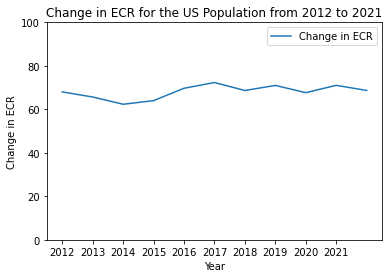

In [87]:
#Question 2 ECR
from scipy.stats.stats import pearsonr
"""
Load in the data from the spreadsheet into a pandas DataFrame
"""
df_survey = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Great Deal': [37, 36, 31, 34, 42, 47, 42, 47, 43, 46, 44],
    'Fair Amount': [36, 33, 35, 34, 31, 30, 30, 27, 26, 29, 27],
    'Only A Little': [19, 23, 24, 22, 19, 16, 20, 18, 22, 15, 18],
    'Not At All': [7, 8, 10, 10, 7, 7, 8, 8, 9, 9, 10]
})
"""
Attach Weights 
"""
cols = ['Great Deal', 'Fair Amount', 'Only A Little', 'Not At All']
df_survey[cols] = df_survey[cols].div(df_survey[cols].sum(axis=1), axis=0) * 100
weights = {'Great Deal': 1, 'Fair Amount': (2/3), 'Only A Little': (1/3), 'Not At All': 0}

# compute weighted care rating for each year
df_survey['Care Rating'] = df_survey[cols].apply(lambda x: (x * [weights[c] for c in cols]).sum(), axis=1)
"""
Print Pearson correleation Coefficient
"""
print(pearsonr(df_survey['Care Rating'],data['sales'])[0])
"""
Plot the Graph
"""
plt.plot(df_survey['Year'], df_survey['Care Rating'],label='Change in ECR')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Change in ECR')
plt.title('Change in ECR for the US Population from 2012 to 2021')
plt.xticks(np.arange(df_survey['Year'].min(), df_survey['Year'].max()))
plt.ylim([0, 100])
plt.show()


0.11808374951905025


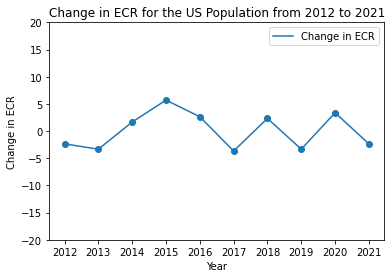

In [141]:
#Question 2 Change in ECR
from scipy.stats.stats import pearsonr
from numpy import diff
"""
Import the survey data into a dataframe
"""
df_survey = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Great Deal': [37, 36, 31, 34, 42, 47, 42, 47, 43, 46, 44],
    'Fair Amount': [36, 33, 35, 34, 31, 30, 30, 27, 26, 29, 27],
    'Only A Little': [19, 23, 24, 22, 19, 16, 20, 18, 22, 15, 18],
    'Not At All': [7, 8, 10, 10, 7, 7, 8, 8, 9, 9, 10]

})
"""
Normalize the data and assign each column value a weight
"""
cols = ['Great Deal', 'Fair Amount', 'Only A Little', 'Not At All']
df_survey[cols] = df_survey[cols].div(df_survey[cols].sum(axis=1), axis=0) * 100
weights = {'Great Deal': 1, 'Fair Amount': (2/3), 'Only A Little': (1/3), 'Not At All': 0}

"""
Compute weighted care rating for each year
"""
df_survey['Care Rating'] = df_survey[cols].apply(lambda x: (x * [weights[c] for c in cols]).sum(), axis=1)
"""
Print Pearson correleation coefficient
"""
print(pearsonr(diff(df_survey['Care Rating']),diff(data['sales']))[0])
"""
Plot the Graph
"""
plt.scatter(df_survey['Year'][:10], diff(df_survey['Care Rating']))
plt.plot(df_survey['Year'][:10], diff(df_survey['Care Rating']),label='Change in ECR')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Change in ECR')
plt.title('Change in ECR for the US Population from 2012 to 2021')
plt.xticks(np.arange(df_survey['Year'].min(), df_survey['Year'].max()))
plt.ylim([-20, 20])
plt.show()


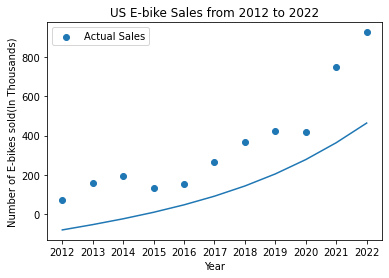

In [167]:
#Question 2: E-bike Sales from 2012 to 2022
plt.scatter(data['year'][:11], data['sales'][:11], label='Actual Sales')
plt.plot(future_years[:11], future_sales[:11])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of E-bikes sold(In Thousands)')
plt.title('US E-bike Sales from 2012 to 2022')
plt.xticks(np.arange(data['year'].min(), data['year'].max()+1, 1))
plt.show()

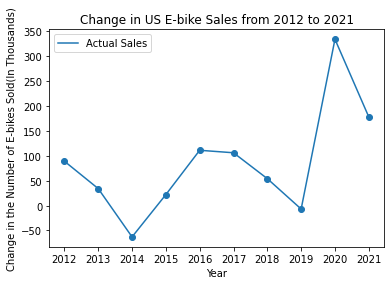

In [172]:
#Question 2: Change in E-bike Sales from 2012 to 2021
from numpy import diff
"""
Apply derivative function onto E-bike sales data before plotting
"""
plt.scatter(data['year'][:10], diff(data['sales']))
plt.plot(data['year'][:10], diff(data['sales']), label='Actual Sales')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Change in the Number of E-bikes Sold(In Thousands)')
plt.title('Change in US E-bike Sales from 2012 to 2021')
plt.xticks(np.arange(df_survey['Year'].min(), df_survey['Year'].max()))
plt.show()

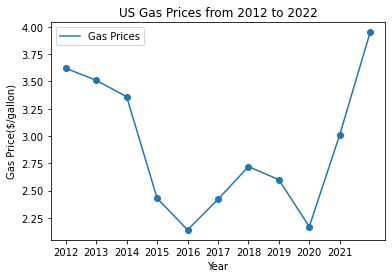

0.2843335965886556


In [108]:
#Question 2 Gas Prices
"""
Import libraries
"""
from scipy.stats.stats import pearsonr
import numpy as np
from numpy import diff
import pandas as pd
import matplotlib.pyplot as plt
"""
Define the DataFrame with every year from 2012 to 2022 and their respective average gas price
"""
df_gas = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Gas Price': [3.62, 3.51, 3.36, 2.43, 2.14, 2.42, 2.72, 2.60, 2.17, 3.01, 3.95]
})

x = df_gas['Year']
y = df_gas['Gas Price']

"""
Plot the data points and the curve
"""
plt.scatter(x,y)
plt.plot(x, y, label='Gas Prices')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Gas Price($/gallon)')
plt.title('US Gas Prices from 2012 to 2022')
plt.xticks(np.arange(df_gas['Year'].min(), df_gas['Year'].max()))
plt.show()
"""
Prints pearson correleation coefficient for the gas prices and e-bike sales
"""
print(pearsonr(df_gas['Gas Price'],data['sales'])[0])

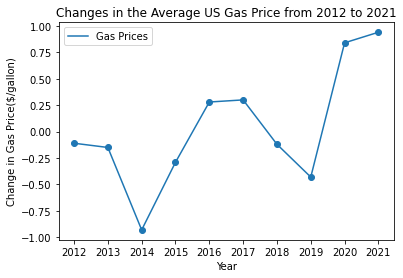

0.9108331871204747


In [173]:
#Question 2: Change in Gas Price
"""
Import libraries
"""
from scipy.stats.stats import pearsonr
import numpy as np
from numpy import diff
import pandas as pd
import matplotlib.pyplot as plt

"""
Define the DataFrame with every year from 2012 to 2022 and their respective average gas price
"""
df_gas = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Gas Price': [3.62, 3.51, 3.36, 2.43, 2.14, 2.42, 2.72, 2.60, 2.17, 3.01, 3.95]
})

x = df_gas['Year']
y = df_gas['Gas Price']

"""
Plot the derivative data points and the curve
"""
plt.scatter(x[:10],diff(y))
plt.plot(x[:10], diff(y), label='Gas Prices')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Change in Gas Price($/gallon)')
plt.title('Changes in the Average US Gas Price from 2012 to 2021')
plt.xticks(np.arange(df_gas['Year'].min(), df_gas['Year'].max()))
plt.show()
"""
Prints pearson correleation coefficient with the derivative of the gas price and e-bike sales
"""
print(pearsonr(diff(df_gas['Gas Price']),diff(data['sales']))[0])

In [115]:
#Question 3
"""
Use Integrate function on the E-bike sales prediction function to get the total amount of E-bike users.
"""
from scipy.integrate import quad
import numpy as np
def getTotalEBikers(year):
    popt = np.array([2.15392431e+03, 2.73812781e-01, 2.02357031e+03, 7.00000000e+01])

    def total_ebike_users(x):
        return (popt[0] / ((1 + np.exp(-popt[1]*(x-popt[2]))))) + 1*(x-popt[2]) - 0.5*(x-popt[2])**2

    result = quad(total_ebike_users, year-4, year)
    return result[0]


In [ ]:
for i in range(2023,2033):
    print(i)
    print(getTotalEBikers(i)*1000*0.915)
    print('\n')

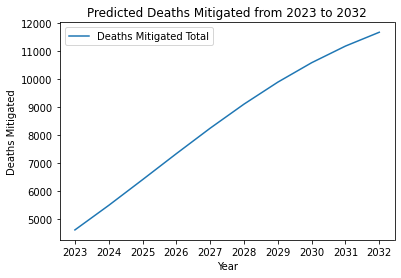

In [138]:
#Question 3
"""
Calculates the number of deaths due to cardiovascular disease and cancer that are mitigated through E-bike usage
"""
CR_cancer_nonactive = 3504/190617
MR_cancer_nonactive = 912/3504
CR_cancer_ebikereg = 89/6364
MR_cancer_ebikereg = 25/89
CR_CVD_nonactive = 1029/198538
MR_CVD_nonactive = 420/1029
CR_CVD_ebikereg = 18/6603
MR_CVD_ebikereg = 8/18
DM_cancer = 0
DM_CVD = 0
DM_fitness = 0
DM_total = []
for i in range(2023,2033):
    DM_cancer = (getTotalEBikers(i)*1000*0.915)*((CR_cancer_nonactive*MR_cancer_nonactive)-(CR_cancer_ebikereg*MR_cancer_ebikereg))
    DM_CVD = (getTotalEBikers(i)*1000*0.915)*((CR_CVD_nonactive*MR_CVD_nonactive)-(CR_CVD_ebikereg*MR_CVD_ebikereg))
    DM_fitness = DM_cancer + DM_CVD
    DM_total.append(DM_fitness)



DM_Years  = np.arange(2023,2033)
# Plot the data points and the curve
plt.plot(DM_Years, DM_total,label="Deaths Mitigated Total")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Deaths Mitigated')
plt.title('Predicted Deaths Mitigated from 2023 to 2032')
plt.xticks(np.arange(2023, 2033))
plt.show()